**SETUP AND LOAD YOLO5 MODEL**

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Total 16008 (delta 0), reused 0 (delta 0), pack-reused 16008
Receiving objects: 100% (16008/16008), 14.56 MiB | 21.52 MiB/s, done.
Resolving deltas: 100% (11011/11011), done.


In [2]:
!cd
!cd yolov5 & pip install -r /content/yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import json

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-6-30 Python-3.10.12 torch-2.0.1+cu118 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 86.7MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


**TEST MODEL ON SAVED IMGAE IN 1a**

In [5]:
#Upload imgae
from google.colab import files


uploaded = files.upload()

Saving frame_1819.jpg to frame_1819.jpg


In [6]:
img = 'frame_1819.jpg'

In [7]:
results = model(img)
results.print()


image 1/1: 1920x1080 (no detections)
Speed: 90.7ms pre-process, 242.0ms inference, 9.5ms NMS per image at shape (1, 3, 640, 384)


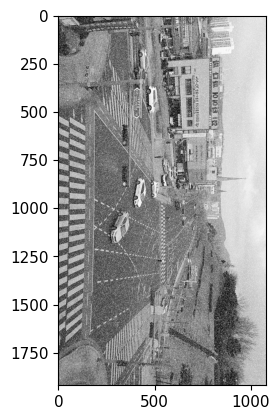

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

**APPLY MODEL TO VIDEO**

In [ ]:
#Upload Intersection.mp4 video / or can use drive
from google.colab import files


uploaded = files.upload()

In [9]:
cap = cv2.VideoCapture('/content/Intersection.mp4')
count=0
detection_info=[]
while cap.isOpened():
    success, frame = cap.read()
    if success == True:
      frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
      # Make detections
      results = model(frame)

      #Save ID, class label, conf info
      class_indices = results.pred[0][:, -1].to(torch.int).tolist()
      class_labels = [model.names[i] for i in class_indices]


      bounding_boxes = results.pred[0][:, :4].detach().cpu().numpy()
      bounding_boxes=bounding_boxes.tolist()

      confidence_scores = results.pred[0][:, 4].detach().cpu().numpy()
      confidence_scores=confidence_scores.tolist()

      obj_info = {
                        'FrameID': count,
                        'Object’s class': class_labels,
                        'Object’s bounding box': bounding_boxes,
                        'Confidence': confidence_scores
                    }
      detection_info.append(obj_info)
      count += 1
      if cv2.waitKey(10) & 0xFF == ord('q'):
          break
    else:
		    break
#Save into JSON file
with open('detections.json', 'w') as json_file:
    json.dump(detection_info, json_file)
cap.release()
cv2.destroyAllWindows()